In [21]:
import main as m

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import SGD

In [23]:
df = m.filter_data

In [24]:
# Split the data into input and target arrays for temperature prediction
X_temp = df[['Precipitation', 'Humidity', 'Pressure', 'Wind Speed']].values
y_temp = df['Temperature'].values

# Split the data into input and target arrays for precipitation prediction
X_prec = df[['Temperature', 'Humidity', 'Pressure', 'Wind Speed']].values
y_prec = df['Precipitation'].values


In [25]:
# We split the dataset into a training and test set.

#For Temperature:

x_temp_train , x_temp_test , y_temp_train , y_temp_test = train_test_split(X_temp, y_temp, test_size =0.2, random_state=42)

#For Precipitation

x_prec_train , x_prec_test , y_prec_train , y_prec_test = train_test_split(X_prec, y_prec, test_size =0.2, random_state=42)

In [26]:
# We reshape y_train and y_test since train_test_split
# outputs them as (nr_samples,) but we need
# (nr_samples ,1)

#for temperature
y_temp_train = y_temp_train.reshape((-1,1))
y_temp_test = y_temp_test.reshape((-1,1))

#for precipitation

y_prec_train = y_prec_train.reshape((-1,1))
y_prec_test = y_prec_test.reshape((-1,1))


In [27]:
#Now we reserve the test set and perform all
# preprocessing and training with the train set only. # The first preprocessing step is to stantardise our # features and target.
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_temp_train = x_scaler.fit_transform(x_temp_train)
x_prec_train = x_scaler.fit_transform(x_prec_train)

y_temp_train = y_scaler.fit_transform(y_temp_train)
y_prec_train = y_scaler.fit_transform(y_prec_train)

#test

x_temp_test = x_scaler.transform(x_temp_test)
x_prec_test = x_scaler.transform(x_prec_test)

y_temp_test = y_scaler.transform(y_temp_test)
y_prec_test = y_scaler.transform(y_prec_test)

In [28]:
x_temp_train.shape

(35060, 4)

In [29]:
#data transdormation for LSTM
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

x_temp_train = np.reshape(x_temp_train, (x_temp_train.shape[0], 1, x_temp_train.shape[1]))
x_temp_test = np.reshape(x_temp_test, (x_temp_test.shape[0], 1, x_temp_test.shape[1]))

x_prec_train = np.reshape(x_prec_train, (x_prec_train.shape[0], 1, x_prec_train.shape[1]))
x_prec_test = np.reshape(x_prec_test, (x_prec_test.shape[0], 1, x_prec_test.shape[1]))



In [30]:
x_prec_test.shape

(8765, 1, 4)

In [31]:
#build the neural network
batch_size =64 
epochs = 50

modelT = Sequential()
modelT.add(LSTM(16, input_shape =(1,4)))
modelT.add(Dropout(0.2))
modelT.add(Dense(64, activation="relu"))
modelT.add(Dropout(0.2))
modelT.add(Dense(64, activation="relu")) 
modelT.add(Dropout(0.2))
modelT.add(Dense(1, activation="linear"))

modelP = Sequential()
modelP.add(LSTM(16, input_shape = (1,4)))
modelP.add(Dropout(0.2))
modelP.add(Dense(64, activation="relu"))
modelP.add(Dropout(0.2))
modelP.add(Dense(64, activation="relu")) 
modelP.add(Dropout(0.2))
modelP.add(Dense(1, activation="linear"))


In [32]:
#complie the methode
# We use a Mean Squared Error - mse - loss.

modelT.compile(loss="mse", optimizer=SGD())
historicalT = modelT.fit(x_temp_train , y_temp_train , batch_size=batch_size , epochs=epochs, verbose=1, validation_split=0.1)



Epoch 1/50
494/494 [==============================] - 3s 3ms/step - loss: 0.8970 - val_loss: 1.0905
Epoch 2/50
494/494 [==============================] - 1s 2ms/step - loss: 0.3804 - val_loss: 0.0476
Epoch 3/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0806 - val_loss: 0.0386
Epoch 4/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0694 - val_loss: 0.0477
Epoch 5/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0724 - val_loss: 0.0528
Epoch 6/50
494/494 [==============================] - 1s 3ms/step - loss: 0.0739 - val_loss: 0.0179
Epoch 7/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0616 - val_loss: 0.0145
Epoch 8/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0630 - val_loss: 0.0286
Epoch 9/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0969 - val_loss: 0.0248
Epoch 10/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0697 - val_loss: 0.0410

In [33]:
modelP.compile(loss="mse", optimizer=SGD())
historicalP = modelP.fit(x_prec_train , y_prec_train , batch_size=batch_size , epochs=epochs, verbose=1, validation_split=0.1)

Epoch 1/50
494/494 [==============================] - 5s 7ms/step - loss: 0.9064 - val_loss: 1.1491
Epoch 2/50
494/494 [==============================] - 2s 4ms/step - loss: 0.5561 - val_loss: 0.2198
Epoch 3/50
494/494 [==============================] - 1s 2ms/step - loss: 0.1167 - val_loss: 0.0097
Epoch 4/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0867 - val_loss: 5.5595e-04
Epoch 5/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0987 - val_loss: 0.0124
Epoch 6/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0814 - val_loss: 0.0139
Epoch 7/50
494/494 [==============================] - 1s 2ms/step - loss: 0.1114 - val_loss: 0.0278
Epoch 8/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0679 - val_loss: 0.0112
Epoch 9/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0651 - val_loss: 0.0218
Epoch 10/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0825 - val_loss: 0.

In [34]:
#evaluation
modelT.evaluate(x_temp_test , y_temp_test)

modelP.evaluate(x_prec_test , y_prec_test)

274/274 [==============================] - 0s 1ms/step - loss: 0.0119


0.011933359317481518

In [35]:
import matplotlib.pyplot as plt

In [36]:
historicalT.history

{'loss': [0.8970214128494263,
  0.3804023563861847,
  0.08061358332633972,
  0.06939612329006195,
  0.07244634628295898,
  0.07391872256994247,
  0.06158857047557831,
  0.06302817165851593,
  0.09692844748497009,
  0.06966004520654678,
  0.05832906439900398,
  0.076468825340271,
  0.07995345443487167,
  0.06702543050050735,
  0.0796738788485527,
  0.05289974436163902,
  0.06996532529592514,
  0.07910417765378952,
  0.05944562330842018,
  0.07133262604475021,
  0.060350120067596436,
  0.048849791288375854,
  0.06765786558389664,
  0.07688266038894653,
  0.06569047272205353,
  0.05673797428607941,
  0.06863569468259811,
  0.06359466910362244,
  0.06580334901809692,
  0.06449036300182343,
  0.06059715151786804,
  0.06265371292829514,
  0.04634817689657211,
  0.05708269402384758,
  0.06267788261175156,
  0.05343108996748924,
  0.04744124412536621,
  0.05698547884821892,
  0.052333831787109375,
  0.05717496573925018,
  0.04826194420456886,
  0.060701884329319,
  0.054635290056467056,
  0.05

In [37]:
historicalP.history

{'loss': [0.9063549637794495,
  0.5561138987541199,
  0.11667553335428238,
  0.08673419803380966,
  0.0987241342663765,
  0.08139736950397491,
  0.11140064150094986,
  0.0679355189204216,
  0.06513462215662003,
  0.08247154951095581,
  0.07378337532281876,
  0.07346387952566147,
  0.07290802150964737,
  0.07756960391998291,
  0.07638968527317047,
  0.09318774938583374,
  0.05382726341485977,
  0.07148391008377075,
  0.056465376168489456,
  0.07097581028938293,
  0.05050165578722954,
  0.08733418583869934,
  0.06961140781641006,
  0.06524520367383957,
  0.059682637453079224,
  0.05391281843185425,
  0.06144802272319794,
  0.05586353316903114,
  0.0693928599357605,
  0.04596356302499771,
  0.04806452617049217,
  0.04585094004869461,
  0.06141652166843414,
  0.05654687434434891,
  0.076943539083004,
  0.05234765261411667,
  0.03414083644747734,
  0.058043304830789566,
  0.04703010618686676,
  0.05271436274051666,
  0.03770242631435394,
  0.05132460966706276,
  0.029888847842812538,
  0.05

In [38]:
from keras.utils.vis_utils import plot_model

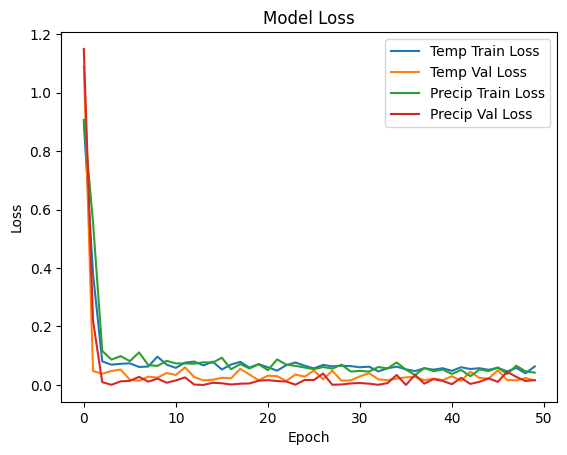

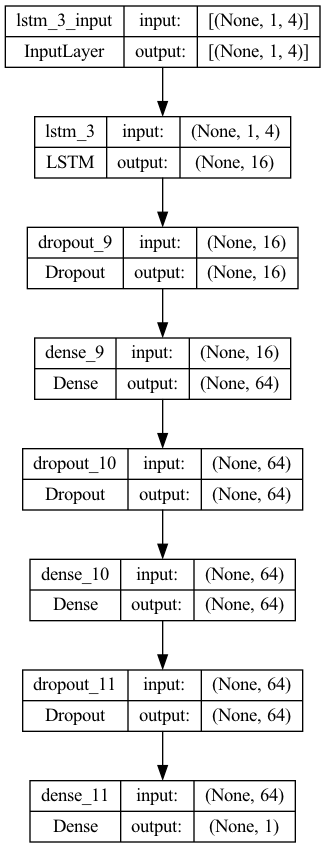

In [39]:
# Visualize model performance
plt.plot(historicalT.history['loss'], label='Temp Train Loss')
plt.plot(historicalT.history['val_loss'], label='Temp Val Loss')
plt.plot(historicalP.history['loss'], label='Precip Train Loss')
plt.plot(historicalP.history['val_loss'], label='Precip Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot model architectures
plot_model(modelT, to_file='model_temp.png', show_shapes=True, show_layer_names=True)
plot_model(modelP, to_file='model_precip.png', show_shapes=True, show_layer_names=True)
